# Programming Assignment: 
## Готовим LDA по рецептам

Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что на состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

Для выполнения заданий, помимо часто используемых в курсе библиотек, потребуются модули *json* и *gensim*. Первый входит в дистрибутив Anaconda, второй можно поставить командой 

*pip install gensim*

Построение модели занимает некоторое время. На ноутбуке с процессором Intel Core i7 и тактовой частотой 2400 МГц на построение одной модели уходит менее 10 минут.

### Загрузка данных

Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [22]:
import json
from zipfile import ZipFile
import codecs # workaround for reading json inside zip, python3 problem.

In [27]:
reader = codecs.getreader("utf-8")
with ZipFile("recipes.zip", "r") as z:
    with z.open('recipes.json') as f:
        recipes = json.load(reader(f))

In [30]:
print(recipes[0])

{'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles'], 'cuisine': 'greek', 'id': 10259}


### Составление корпуса

In [31]:
from gensim import corpora, models
import numpy as np

/usr/local/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [279]:
texts = [recipe["ingredients"] for recipe in recipes]
dictionary = corpora.Dictionary(texts)   # составляем словарь
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов

In [180]:
print(texts[0])
print(corpus[1])

['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
[(9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели *show_topics*, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода *show_topics* указать параметр *formatted=True*, то топы ингредиентов будет удобно выводить на печать, если *formatted=False*, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [280]:
np.random.seed(76543)
# здесь код для построения модели:
model = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=40, passes=5)

In [182]:
topics = model.show_topics(num_topics=40, num_words=10, formatted=False)
model.print_topics(num_topics=40, num_words=10)

[(0,
  '0.075*"chopped cilantro fresh" + 0.069*"garlic cloves" + 0.066*"peeled fresh ginger" + 0.043*"fresh lime juice" + 0.042*"vegetable oil" + 0.041*"medium shrimp" + 0.039*"sweet onion" + 0.039*"lime wedges" + 0.036*"crushed red pepper" + 0.028*"chopped fresh mint"'),
 (1,
  '0.120*"white onion" + 0.056*"tomatillos" + 0.050*"serrano chile" + 0.044*"low sodium chicken broth" + 0.039*"vegetable oil" + 0.038*"chiles" + 0.037*"kosher salt" + 0.037*"bananas" + 0.035*"garlic cloves" + 0.034*"water"'),
 (2,
  '0.074*"fresh lime juice" + 0.074*"purple onion" + 0.061*"chicken breasts" + 0.048*"red bell pepper" + 0.046*"cheese" + 0.037*"tomatoes" + 0.031*"yellow bell pepper" + 0.028*"chopped cilantro fresh" + 0.027*"asparagus" + 0.024*"salt and ground black pepper"'),
 (3,
  '0.090*"coarse salt" + 0.089*"parmesan cheese" + 0.057*"white wine" + 0.056*"ground pepper" + 0.039*"olive oil" + 0.037*"fresh spinach" + 0.034*"parsley" + 0.027*"sausages" + 0.025*"garlic" + 0.023*"butter"'),
 (4,
  '0.

In [183]:
from collections import Counter
terms = [term[0] for topic in topics for term in topic[1]]
groups = Counter(terms)

answer1 = [groups[k] for k in ["salt", "sugar", "water", "mushrooms", "chicken", "eggs"]]
answer1

[16, 7, 10, 1, 0, 1]

In [184]:
def save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs):
    with open("cooking_LDA_pa_task1.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs]]))

In [185]:
save_answers1(*answer1)

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — фильтрация словаря по частоте. Обычно словарь фильтруют с двух сторон: убирают очень редкие слова (в целях экономии памяти) и очень частые слова (в целях повышения интерпретируемости тем). Мы уберем только частые слова.

In [186]:
import copy
dictionary2 = copy.deepcopy(dictionary)

__Задание 2.__ У объекта dictionary2 есть переменная *dfs* — это словарь, ключами которого являются id токена, а элементами — число раз, сколько слово встретилось во всей коллекции. Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше 4000 раз. Вызовите метод словаря *filter_tokens*, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: dict_size_before и dict_size_after — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, corpus2, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: corpus_size_before и corpus_size_after — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины dict_size_before, dict_size_after, corpus_size_before, corpus_size_after в функцию save_answers2 и загрузите сгенерированный файл в форму.

In [187]:
frequent_words = [t_id for t_id, freq in dictionary2.dfs.items() if freq > 4000]
frequent_words

[1, 2, 9, 17, 18, 22, 29, 34, 48, 62, 105, 114]

In [188]:
dictionary2.filter_tokens(frequent_words)

In [278]:
print(len(dictionary2))
print(len(dictionary))

6702
6714


In [190]:
corpus2 = [dictionary2.doc2bow(text) for text in texts]  # составляем корпус документов

In [277]:
def get_corpus_size(corpus):
    size = 0
    for item in corpus:
        size += len(item)
    return size

print(get_corpus_size(corpus))
print(get_corpus_size(corpus2))

428249
343665


In [192]:
def save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open("cooking_LDA_pa_task2.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))

In [193]:
save_answers2(len(dictionary), len(dictionary2), get_corpus_size(corpus), get_corpus_size(corpus2))

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу corpus2 и словарю dictionary2, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование seed!

Затем воспользуйтесь методом *top_topics* модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию save_answers3. 

In [286]:
np.random.seed(76543)
model2 = models.ldamodel.LdaModel(corpus2, id2word=dictionary2, num_topics=40, passes=5)

In [295]:
top_topics2 = model2.top_topics(corpus2)
top_topics = model.top_topics(corpus)

In [304]:
coherence = np.array(top_topics)[:,1].mean()

In [305]:
coherence2 = np.array(top_topics2)[:,1].mean()

In [307]:
def save_answers3(coherence, coherence2):
    with open("cooking_LDA_pa_task3.txt", "w") as fout:
        fout.write(" ".join(["%3f"%el for el in [coherence, coherence2]]))

In [308]:
save_answers3(coherence, coherence2)
coherence, coherence2

(-622.36787955009663, -674.41435702168769)

Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом *get_document_topics* второй модели:

In [215]:
model2.get_document_topics(corpus2[0])

[(6, 0.15100787093232432),
 (9, 0.12812500000000002),
 (22, 0.12812499999999999),
 (32, 0.4802421290676756)]

Также выведите содержимое переменной *.alpha* второй модели:

In [202]:
model2.alpha

array([ 0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,
        0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025,  0.025])

У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр alpha, задающий априорное распределение Дирихле для распределений тем в документах.

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр __alpha=1__, passes=5. Не забудьте про фиксацию seed! Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, __превосходящих 0.01__, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели для каждого документа с параметром *minimum_probability=0.01* и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с alpha по умолчанию, затем для модели в alpha=1) в функцию save_answers4.

In [203]:
np.random.seed(76543)
model3 = models.ldamodel.LdaModel(corpus2, id2word=dictionary2, num_topics=40, passes=5, alpha=1)

In [216]:
model3.get_document_topics(corpus2[0])

[(0, 0.021585777295909638),
 (1, 0.022053841055209172),
 (2, 0.045475904512110636),
 (3, 0.02131259217791831),
 (4, 0.042652787051114457),
 (5, 0.021276595744680861),
 (6, 0.022206592587050079),
 (7, 0.044986229662678012),
 (8, 0.021459104524872),
 (9, 0.021296588159649393),
 (10, 0.040931623688876602),
 (11, 0.021276595744680861),
 (12, 0.021349569453393367),
 (13, 0.04027867724379644),
 (14, 0.021297345009512123),
 (15, 0.021357946126415246),
 (16, 0.021276595751146633),
 (17, 0.022011060704347298),
 (18, 0.021276595757809862),
 (19, 0.02128454307903517),
 (20, 0.023924250907795687),
 (21, 0.021276595744680861),
 (22, 0.021691185986197441),
 (23, 0.021367288157145677),
 (24, 0.021323943869017249),
 (25, 0.021276598256538451),
 (26, 0.024386937188957906),
 (27, 0.021350017983468601),
 (28, 0.021280405157588635),
 (29, 0.021306755356748492),
 (30, 0.021395834643414158),
 (31, 0.021279005163170328),
 (32, 0.021332581146872909),
 (33, 0.021276595744680861),
 (34, 0.021281756094305451),
 

In [222]:
def count_topics(model, corpuses):
    accum = 0
    for doc in corpuses:
        topics = model.get_document_topics(doc, minimum_probability=0.01)
        accum += len(topics)
    return accum

count_model2 = count_topics(model2, corpus2)
count_model3 = count_topics(model3, corpus2)
print(count_model2, count_model3)

196816 1590960


In [223]:
def save_answers4(count_model2, count_model3):
    with open("cooking_LDA_pa_task4.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [count_model2, count_model3]]))

In [224]:
save_answers4(count_model2, count_model3)

Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим классификатор рецептов на кухни на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с alpha по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод get_document_topics, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции cross_val_score вычислите среднюю accuracy по трем фолдам (перемешивать данные не нужно) и передайте в функцию save_answers5.

In [255]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

In [262]:
def build_matrix(model, corpus):
    matrix = {}
    for i, doc in enumerate(corpus):
        matrix[i] = {}
        topics = model.get_document_topics(doc)
        for topic in topics:
            matrix[i][topic[0]] = topic[1]
   
    return matrix

matrix = build_matrix(model2, corpus2)

In [263]:
X = pd.DataFrame.from_dict(matrix).fillna(0).T
y = np.array([recipe['cuisine'] for recipe in recipes])
X.shape, y.shape

((39774, 40), (39774,))

In [264]:
clf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
scores

array([ 0.55771696,  0.55645222,  0.56082101])

In [265]:
def save_answers5(accuracy):
     with open("cooking_LDA_pa_task5.txt", "w") as fout:
        fout.write(str(accuracy))

In [266]:
save_answers5(np.mean(scores))

Для такого большого количества классов это неплохая точность. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [268]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        terms = [x[0] for x in topic]
        w = np.random.choice(terms, p=topic_distr)
        print(w)

In [272]:
generate_recipe(model2, 5)

mushrooms
farro
active dry yeast
lump crab meat
baking powder


### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [273]:
import pandas
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [274]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pandas.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pandas.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pandas.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [275]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(10, 10))
    seaborn.heatmap(tc_matrix, square=True)

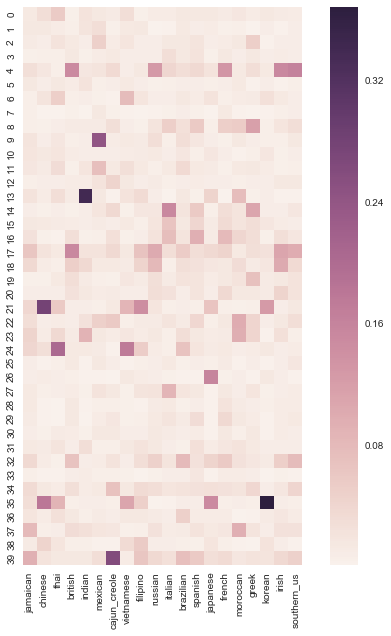

In [276]:
# Визуализируйте матрицу
plot_matrix(compute_topic_cuisine_matrix(model, corpus, recipes))

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...

### Заключение
В этом задании вы построили несколько моделей LDA, посмотрели, на что влияют гиперпараметры модели и как можно использовать построенную модель. 